In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df = pd.read_csv('KaggleV2-May-2016.csv')

In [24]:
df.shape

(110527, 14)

In [25]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [27]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [28]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [29]:
df.duplicated().sum()

np.int64(0)

In [30]:
invalid_ages = df[df['Age']<0] 
invalid_ages

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [31]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [32]:
df = df[df['Age']>=0]

In [33]:
invalid_age = df[df['Age']<0]
invalid_age 

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [34]:
df['ScheduledDay'].dtype

dtype('O')

<Axes: xlabel='Age', ylabel='Count'>

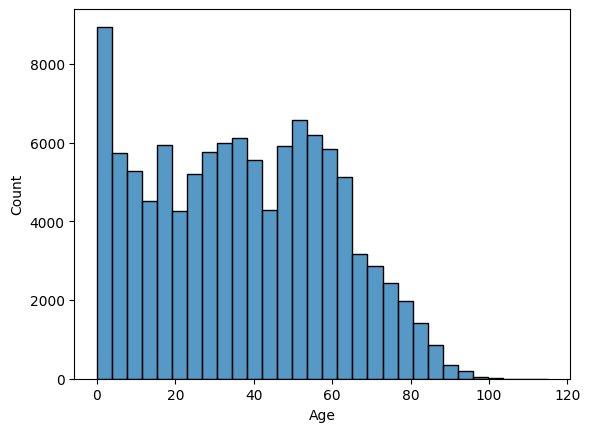

In [35]:
sns.histplot(df['Age'], bins = 30)

In [36]:
df['Gender'].value_counts()

Gender
F    71839
M    38687
Name: count, dtype: int64

Total of 71839 women and 38687 men were scheduled for an appointment.

No of females are more than males who took appointment

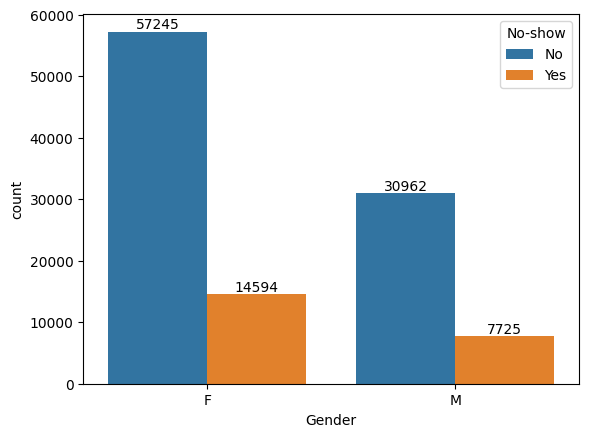

In [60]:
ax = sns.countplot(x = 'Gender', hue= 'No-show',  data = df)

for container in ax.containers:
    ax.bar_label(container, fmt = '%d', label_type = 'edge', fontsize = 10, color = 'Black')

14594 Females and 7725 Males did not show up to the Appointment

<Axes: xlabel='No-show', ylabel='count'>

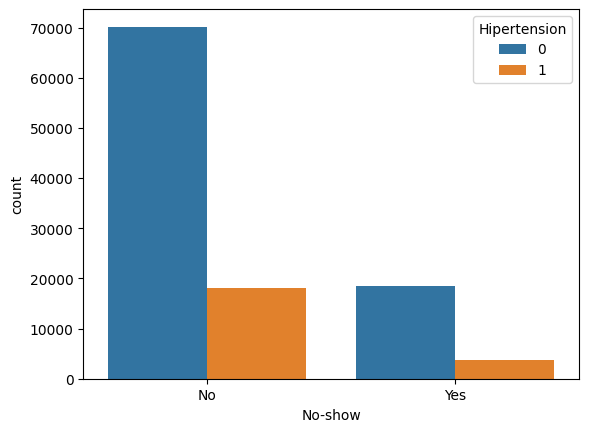

In [38]:
sns.countplot(x = 'No-show', hue = 'Hipertension', data = df) 

In [39]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [40]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'], errors = 'coerce')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'], errors = 'coerce')

print(df[['ScheduledDay', 'AppointmentDay']].dtypes)

ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
dtype: object


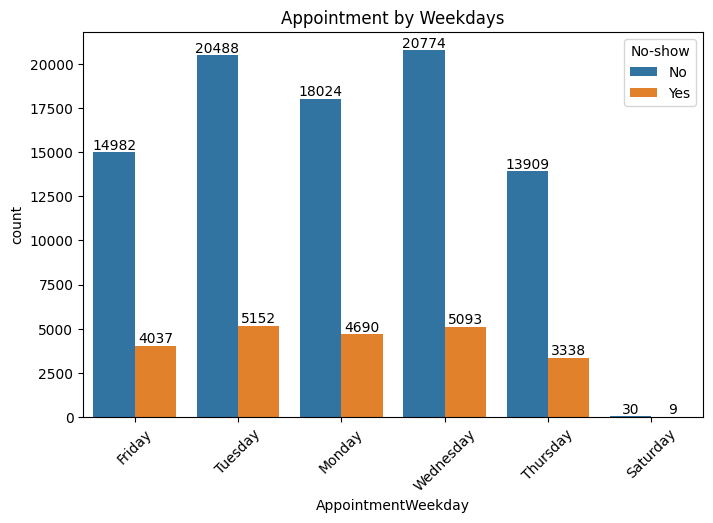

In [63]:
df['ScheduledMonth'] = df['ScheduledDay'].dt.month
df['AppointmentWeekday'] = df['AppointmentDay'].dt.day_name()

plt.figure(figsize = (8,5))
ax = sns.countplot(x = 'AppointmentWeekday' , hue = 'No-show' , data = df)
plt.title("Appointment by Weekdays")
plt.xticks(rotation = 45)


for container in ax.containers:
    ax.bar_label(container, fmt = '%d', label_type = 'edge', color = 'black', fontsize = 10)

In [44]:
df['AppointmentWeekday'].value_counts()

AppointmentWeekday
Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: count, dtype: int64

Most appointments were booked for Wednesday and Tuesdays. Only 39 appointments were booked for Saturday

25k+ Appointments were booked for Wednesdays and Tuesday

# Statistical Tests #

In [45]:
from scipy.stats import chi2_contingency, ttest_ind

In [48]:
df['no_show_numeric'] = df['No-show'].map({'Yes': 1, 'No': 0})

T statistics = 20.09233732132302, P_value = 1.2461264408928903e-89


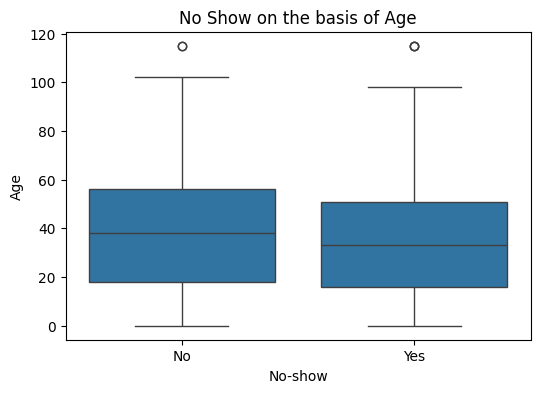

In [51]:
plt.figure(figsize = (6,4))
sns.boxplot(x = 'No-show', y = 'Age', data = df)
plt.title("No Show on the basis of Age")


show = df[df['no_show_numeric'] == 0]['Age']
no_show = df[df['no_show_numeric'] == 1]['Age']

t_stat, p_value = ttest_ind(show,no_show)
print(f"T statistics = {t_stat}, P_value = {p_value}")

t_stats = (mean of show)-(mean of no show)/standard error

*
T statistics = 20.09 indicating a significant difference between the two groups.
There is the huge age difference in patient who did and did not show up to the appointment
*
The difference is real and not random since p value < 0.005. Age difference is highly significant
*
Since P-value < 0.05, we reject the null hypothesis (H₀) and conclude that there is a significant difference in Age between those who showed up vs. those who didn’t.


In [52]:
print("Average Age of Show group:", df[df['no_show_numeric'] == 0]['Age'].mean())
print("Average Age of No-show group:", df[df['no_show_numeric'] == 1]['Age'].mean())


Average Age of Show group: 37.790504154999034
Average Age of No-show group: 34.31766656212196


In [53]:
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 18, 35, 50, 65, 100], labels=['0-18', '19-35', '36-50', '51-65', '65+'])
no_show_percentage = df.groupby('Age_Group')['no_show_numeric'].mean() * 100
print(no_show_percentage)


Age_Group
0-18     22.537213
19-35    23.834776
36-50    20.325792
51-65    16.549137
65+      15.518279
Name: no_show_numeric, dtype: float64


C:\Users\HP\AppData\Local\Temp\ipykernel_17236\3504788437.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_show_percentage = df.groupby('Age_Group')['no_show_numeric'].mean() * 100


**Most of the people who did not show up to the appointment are of Age-Group : 19-35**

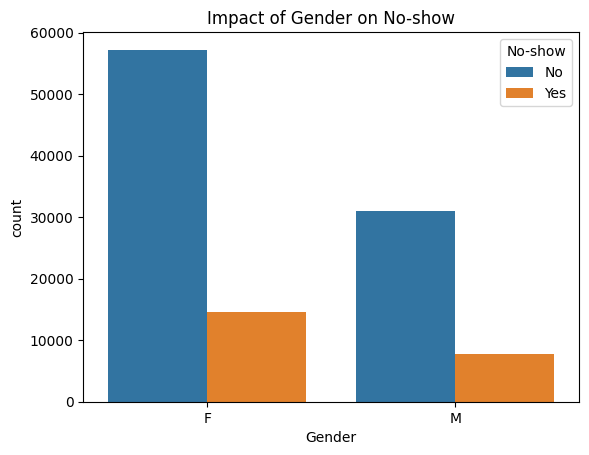

No-show     No    Yes
Gender               
F        57245  14594
M        30962   7725
Chi-square: 1.8564579422090786, P-value: 0.17303416173736574
dof: 1, Expected:[[57332.23560972 14506.76439028]
 [30874.76439028  7812.23560972]]


In [54]:
# Countplot: Gender vs No-show
sns.countplot(x='Gender', hue='No-show', data=df)
plt.title('Impact of Gender on No-show')
plt.show()

# Chi-square test for Gender and No-show
contingency_table = pd.crosstab(df['Gender'], df['No-show'])
print(contingency_table)
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square: {chi2}, P-value: {p}")
print(f"dof: {dof}, Expected:{expected}")


- p value > 0.005 so, there is no statistically significant relationship between gender and no shows
- Gender is not the strong factor influencing appointment no shows
- chi-square statistic value is low this means that gender and no show are independent of each other
- differences b/w male and female no show is random chamce rather than real pattern


**There is no statistically significant relationship b/w gender and no - show. Gender does not significantly impact on missed appointments**

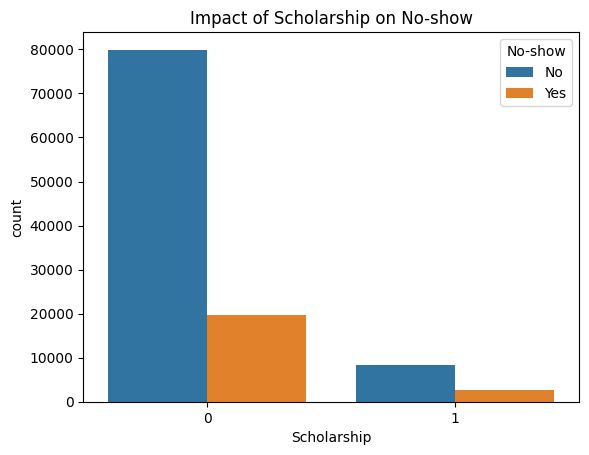

Scholarship - Chi-square: 93.56699405193226, P-value: 3.9268156991039656e-22


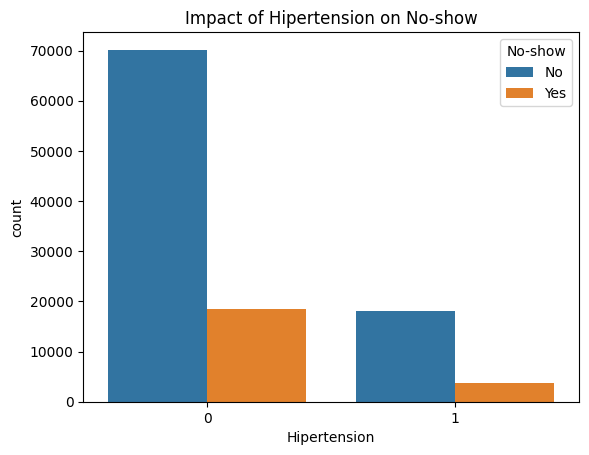

Hipertension - Chi-square: 140.66859528017784, P-value: 1.9011212241495915e-32


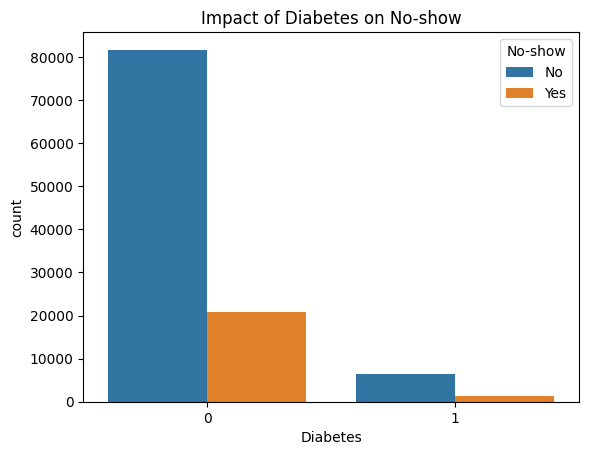

Diabetes - Chi-square: 25.326693550869877, P-value: 4.839646820880228e-07


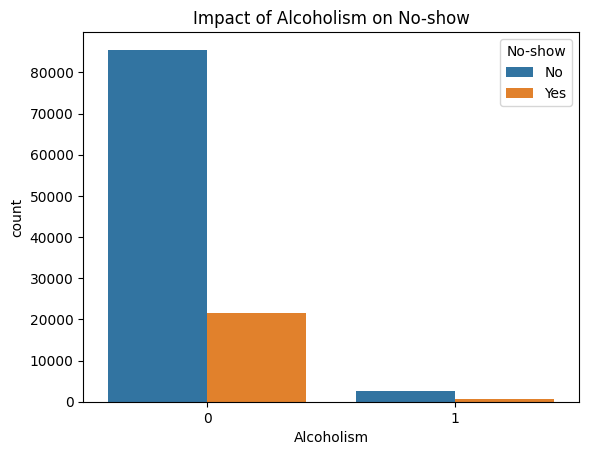

Alcoholism - Chi-square: 0.0019029106265759325, P-value: 0.9652054249010444


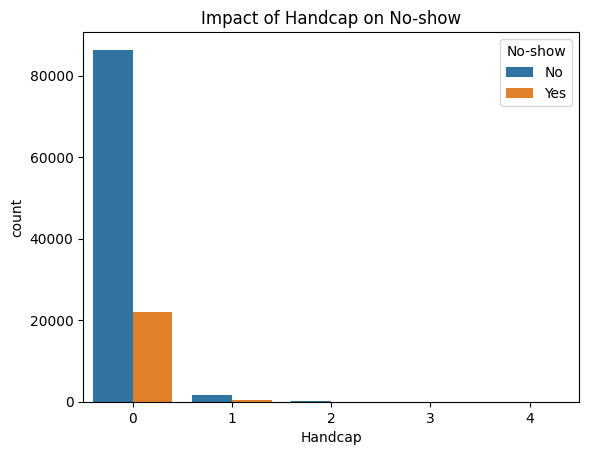

Handcap - Chi-square: 7.0355910310228875, P-value: 0.13401931354992297


In [69]:
health_conditions = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap']

for condition in health_conditions:
    sns.countplot(x=condition, hue='No-show', data=df)
    plt.title(f'Impact of {condition} on No-show')
    plt.show()

    # Chi-square test
    contingency_table = pd.crosstab(df[condition], df['No-show'])

    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"{condition} - Chi-square: {chi2}, P-value: {p}")


The chi-square test revealed that - 
- Scholarship has strong and significant relationship,
- Hypertension has very strong and significant relationship,
- Diabetes have significant relationship
- Alcoholism and Handicap were not significantly associated with no-show rates (P-value > 0.05)

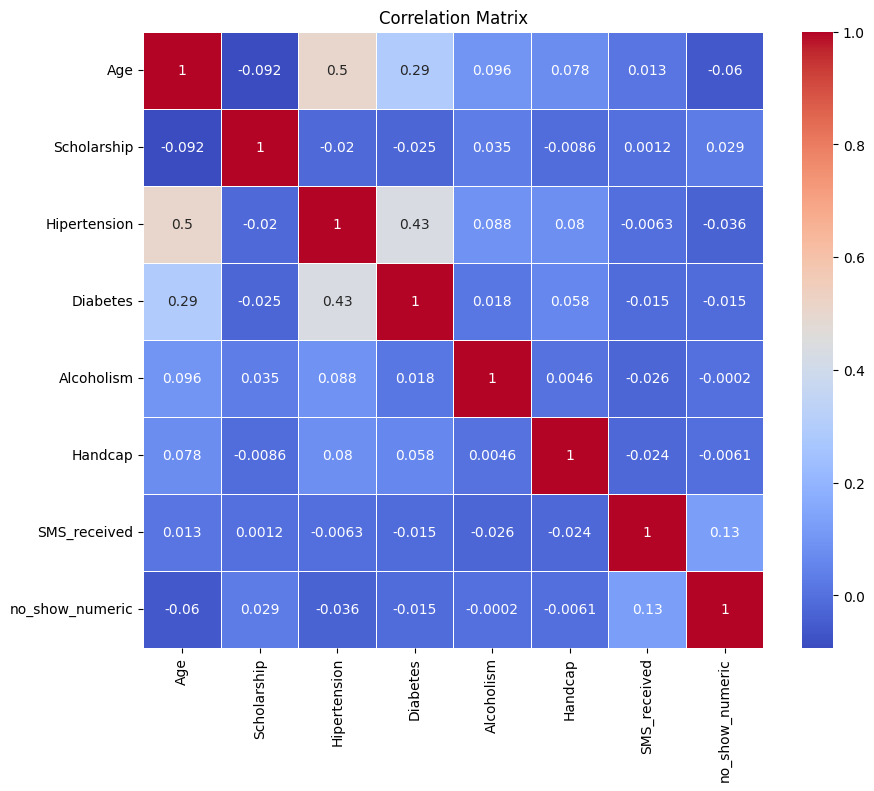

In [68]:
# Correlation matrix
correlation_matrix = df[['Age', 'Scholarship', 'Hipertension', 'Diabetes', 
                         'Alcoholism', 'Handcap', 'SMS_received', 'no_show_numeric']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth = 0.5)
plt.title('Correlation Matrix')
plt.show()


- Hypertension, Diabetes, Alcoholism and Handicap have negative correlation with No-shows it means health condition do not impact much for no shows.
- Age and No-shows have negative correlation which means that older patient do not tend to miss the appointments
- SMS received and No shows have weak positive correlation which suggest that SMS received does not create huge impact on no shows
